# **Task 2: Collision Detection in Audio and Video Data**
This project performs a two-part analysis:

- **Audio Analysis** – Detecting sound peaks that likely indicate collisions.

- **Video Analysis** – Detecting ball collisions within video frames based on movement and boundary detection.

# Audio Analysis Part

## 1. **Library Imports and Setup**


In [12]:
import os
import numpy as np
import librosa
import librosa.display
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from scipy.signal import find_peaks
from IPython.display import Audio

In [13]:
video_folder = "video_only"
audio_folder = "audio_only"

## 2. **Duration Extraction Functions**
- `get_audio_duration` loads an audio file and computes the duration using sample count and sample rate.
- `get_video_duration` extracts the video duration using frame rate and total frame count

In [14]:
def get_audio_duration(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    return len(y) / sr

def get_video_duration(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    cap.release()
    return total_frames / fps if fps > 0 else 0

## 3. **Audio and Video Duration Analysis**
This block collects durations for all audio files and prints a frequency distribution.


In [15]:
audio_durations = [round(get_audio_duration(os.path.join(audio_folder, f))) 
                   for f in os.listdir(audio_folder) if f.endswith(".wav")]
audio_duration_counts = Counter(audio_durations)
print("\nAudio Duration Distribution (seconds):", audio_duration_counts)



Audio Duration Distribution (seconds): Counter({20: 45})


Same logic as above is applied to video files.



In [16]:
video_durations = [round(get_video_duration(os.path.join(video_folder, f))) 
                   for f in os.listdir(video_folder) if f.endswith(".mp4")]
video_duration_counts = Counter(video_durations)
print("Video Duration Distribution (seconds):", video_duration_counts)


Video Duration Distribution (seconds): Counter({20: 45})


## 4. **Audio Collision Detection**
**Process Explained:**

* Compute the **Short-Time Fourier Transform (STFT)** to get time-frequency data.
* Convert amplitudes to dB scale.
* Normalize average energy across time.
* Use `find_peaks` to identify high-energy moments likely representing a collision

In [17]:
def detect_collisions(audio_path, threshold=0.8):
    y, sr = librosa.load(audio_path, sr=None)
    S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    avg_energy = np.mean(S_db, axis=0)
    norm_energy = (avg_energy - np.min(avg_energy)) / (np.max(avg_energy) - np.min(avg_energy))
    peaks, _ = find_peaks(norm_energy, height=threshold)
    peak_times = librosa.frames_to_time(peaks, sr=sr, hop_length=512)
    return peak_times, S_db, sr, y

# Test on a sample file
audio_file = os.path.join(audio_folder, "audio_only_ID_11.wav")
peak_times, S_db, sr, y = detect_collisions(audio_file)

print("\nCollision Peak Times (seconds):", peak_times)



Collision Peak Times (seconds): [ 0.32   0.992  1.664  2.272  3.008  3.68   4.32   4.992  5.664  6.336
  7.008  7.648  8.32   8.992  9.664 10.272 11.008 11.68  12.32  12.896
 12.992 13.664 14.336 15.008 15.456 15.68  16.32  16.992 17.664 17.984
 18.336 19.008 19.68 ]


In [18]:
Audio(y, rate=sr)

## 5. **Visualizing Collision Events on Spectrogram**


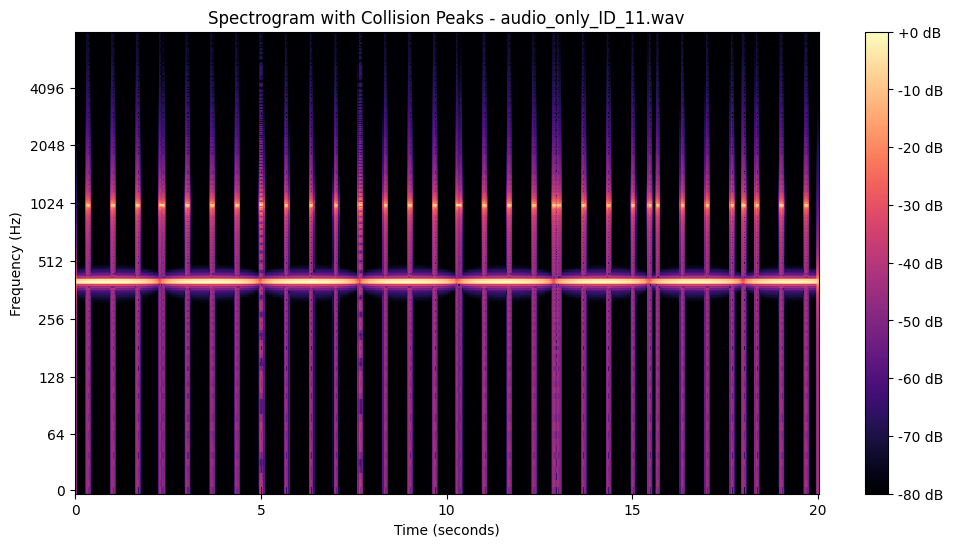

In [19]:
plt.figure(figsize=(12, 6))
plt.title(f"Spectrogram with Collision Peaks - {os.path.basename(audio_file)}")
librosa.display.specshow(S_db, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()


## 6. **Batch Collision Detection for All Audio Files**
Each audio file is processed individually, storing collision peak timestamps.


In [20]:
collision_data = {}

for audio_file in os.listdir(audio_folder):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(audio_folder, audio_file)
        print(f"Processing: {audio_file}")
        peak_times, _, _, _ = detect_collisions(audio_path)
        collision_data[audio_file] = peak_times.tolist()

print("\nProcessed Audio Collisions:")
for audio_name, collisions in collision_data.items():
    print(f"{audio_name}: {collisions}")

Processing: audio_only_ID_1.wav
Processing: audio_only_ID_10.wav
Processing: audio_only_ID_11.wav
Processing: audio_only_ID_12.wav
Processing: audio_only_ID_13.wav
Processing: audio_only_ID_14.wav
Processing: audio_only_ID_15.wav
Processing: audio_only_ID_16.wav
Processing: audio_only_ID_17.wav
Processing: audio_only_ID_18.wav
Processing: audio_only_ID_19.wav
Processing: audio_only_ID_2.wav
Processing: audio_only_ID_20.wav
Processing: audio_only_ID_21.wav
Processing: audio_only_ID_22.wav
Processing: audio_only_ID_23.wav
Processing: audio_only_ID_24.wav
Processing: audio_only_ID_25.wav
Processing: audio_only_ID_26.wav
Processing: audio_only_ID_27.wav
Processing: audio_only_ID_28.wav
Processing: audio_only_ID_29.wav
Processing: audio_only_ID_3.wav
Processing: audio_only_ID_30.wav
Processing: audio_only_ID_31.wav
Processing: audio_only_ID_32.wav
Processing: audio_only_ID_33.wav
Processing: audio_only_ID_34.wav
Processing: audio_only_ID_35.wav
Processing: audio_only_ID_36.wav
Processing: a

In [21]:
collision_data # Display all collision data for all the audio files

{'audio_only_ID_1.wav': [1.632,
  2.72,
  4.864,
  5.824,
  8.096,
  8.864,
  11.328,
  11.872,
  14.56,
  14.88,
  17.824],
 'audio_only_ID_10.wav': [0.512,
  1.536,
  2.432,
  2.592,
  3.616,
  4.64,
  5.28,
  5.696,
  6.72,
  7.744,
  8.064,
  8.768,
  9.824,
  10.848,
  11.872,
  12.928,
  13.568,
  13.952,
  14.976,
  16.032,
  16.256,
  17.056,
  18.08,
  18.944,
  19.104],
 'audio_only_ID_11.wav': [0.32,
  0.992,
  1.664,
  2.272,
  3.008,
  3.68,
  4.32,
  4.992,
  5.664,
  6.336,
  7.008,
  7.648,
  8.32,
  8.992,
  9.664,
  10.272,
  11.008,
  11.68,
  12.32,
  12.896,
  12.992,
  13.664,
  14.336,
  15.008,
  15.456,
  15.68,
  16.32,
  16.992,
  17.664,
  17.984,
  18.336,
  19.008,
  19.68],
 'audio_only_ID_12.wav': [1.76,
  3.232,
  4.064,
  6.304,
  8.544,
  9.696,
  10.752,
  12.928,
  15.04,
  16.16,
  17.152,
  19.232],
 'audio_only_ID_13.wav': [0.448,
  1.312,
  1.376,
  2.176,
  3.04,
  3.456,
  3.904,
  4.768,
  5.504,
  5.632,
  6.496,
  7.36,
  7.52,
  8.224,
  9

## 7. **Summarizing Audio Collisions**
This part counts the number of collision events per file and prints a summary.



In [22]:
collision_counts = {audio_name: len(collisions) for audio_name, collisions in collision_data.items()}

print("\nTotal Number of Collisions for Each Audio File:")
for audio_name, count in collision_counts.items():
    print(f"{audio_name}: {count}")


Total Number of Collisions for Each Audio File:
audio_only_ID_1.wav: 11
audio_only_ID_10.wav: 25
audio_only_ID_11.wav: 33
audio_only_ID_12.wav: 12
audio_only_ID_13.wav: 33
audio_only_ID_14.wav: 1
audio_only_ID_15.wav: 30
audio_only_ID_16.wav: 12
audio_only_ID_17.wav: 22
audio_only_ID_18.wav: 16
audio_only_ID_19.wav: 30
audio_only_ID_2.wav: 2
audio_only_ID_20.wav: 32
audio_only_ID_21.wav: 19
audio_only_ID_22.wav: 27
audio_only_ID_23.wav: 16
audio_only_ID_24.wav: 13
audio_only_ID_25.wav: 11
audio_only_ID_26.wav: 12
audio_only_ID_27.wav: 20
audio_only_ID_28.wav: 12
audio_only_ID_29.wav: 23
audio_only_ID_3.wav: 16
audio_only_ID_30.wav: 25
audio_only_ID_31.wav: 13
audio_only_ID_32.wav: 36
audio_only_ID_33.wav: 13
audio_only_ID_34.wav: 19
audio_only_ID_35.wav: 16
audio_only_ID_36.wav: 39
audio_only_ID_37.wav: 14
audio_only_ID_38.wav: 18
audio_only_ID_39.wav: 24
audio_only_ID_4.wav: 12
audio_only_ID_40.wav: 16
audio_only_ID_41.wav: 28
audio_only_ID_42.wav: 23
audio_only_ID_43.wav: 35
audio_o

## 8. **Batch Visualization of Spectrograms**


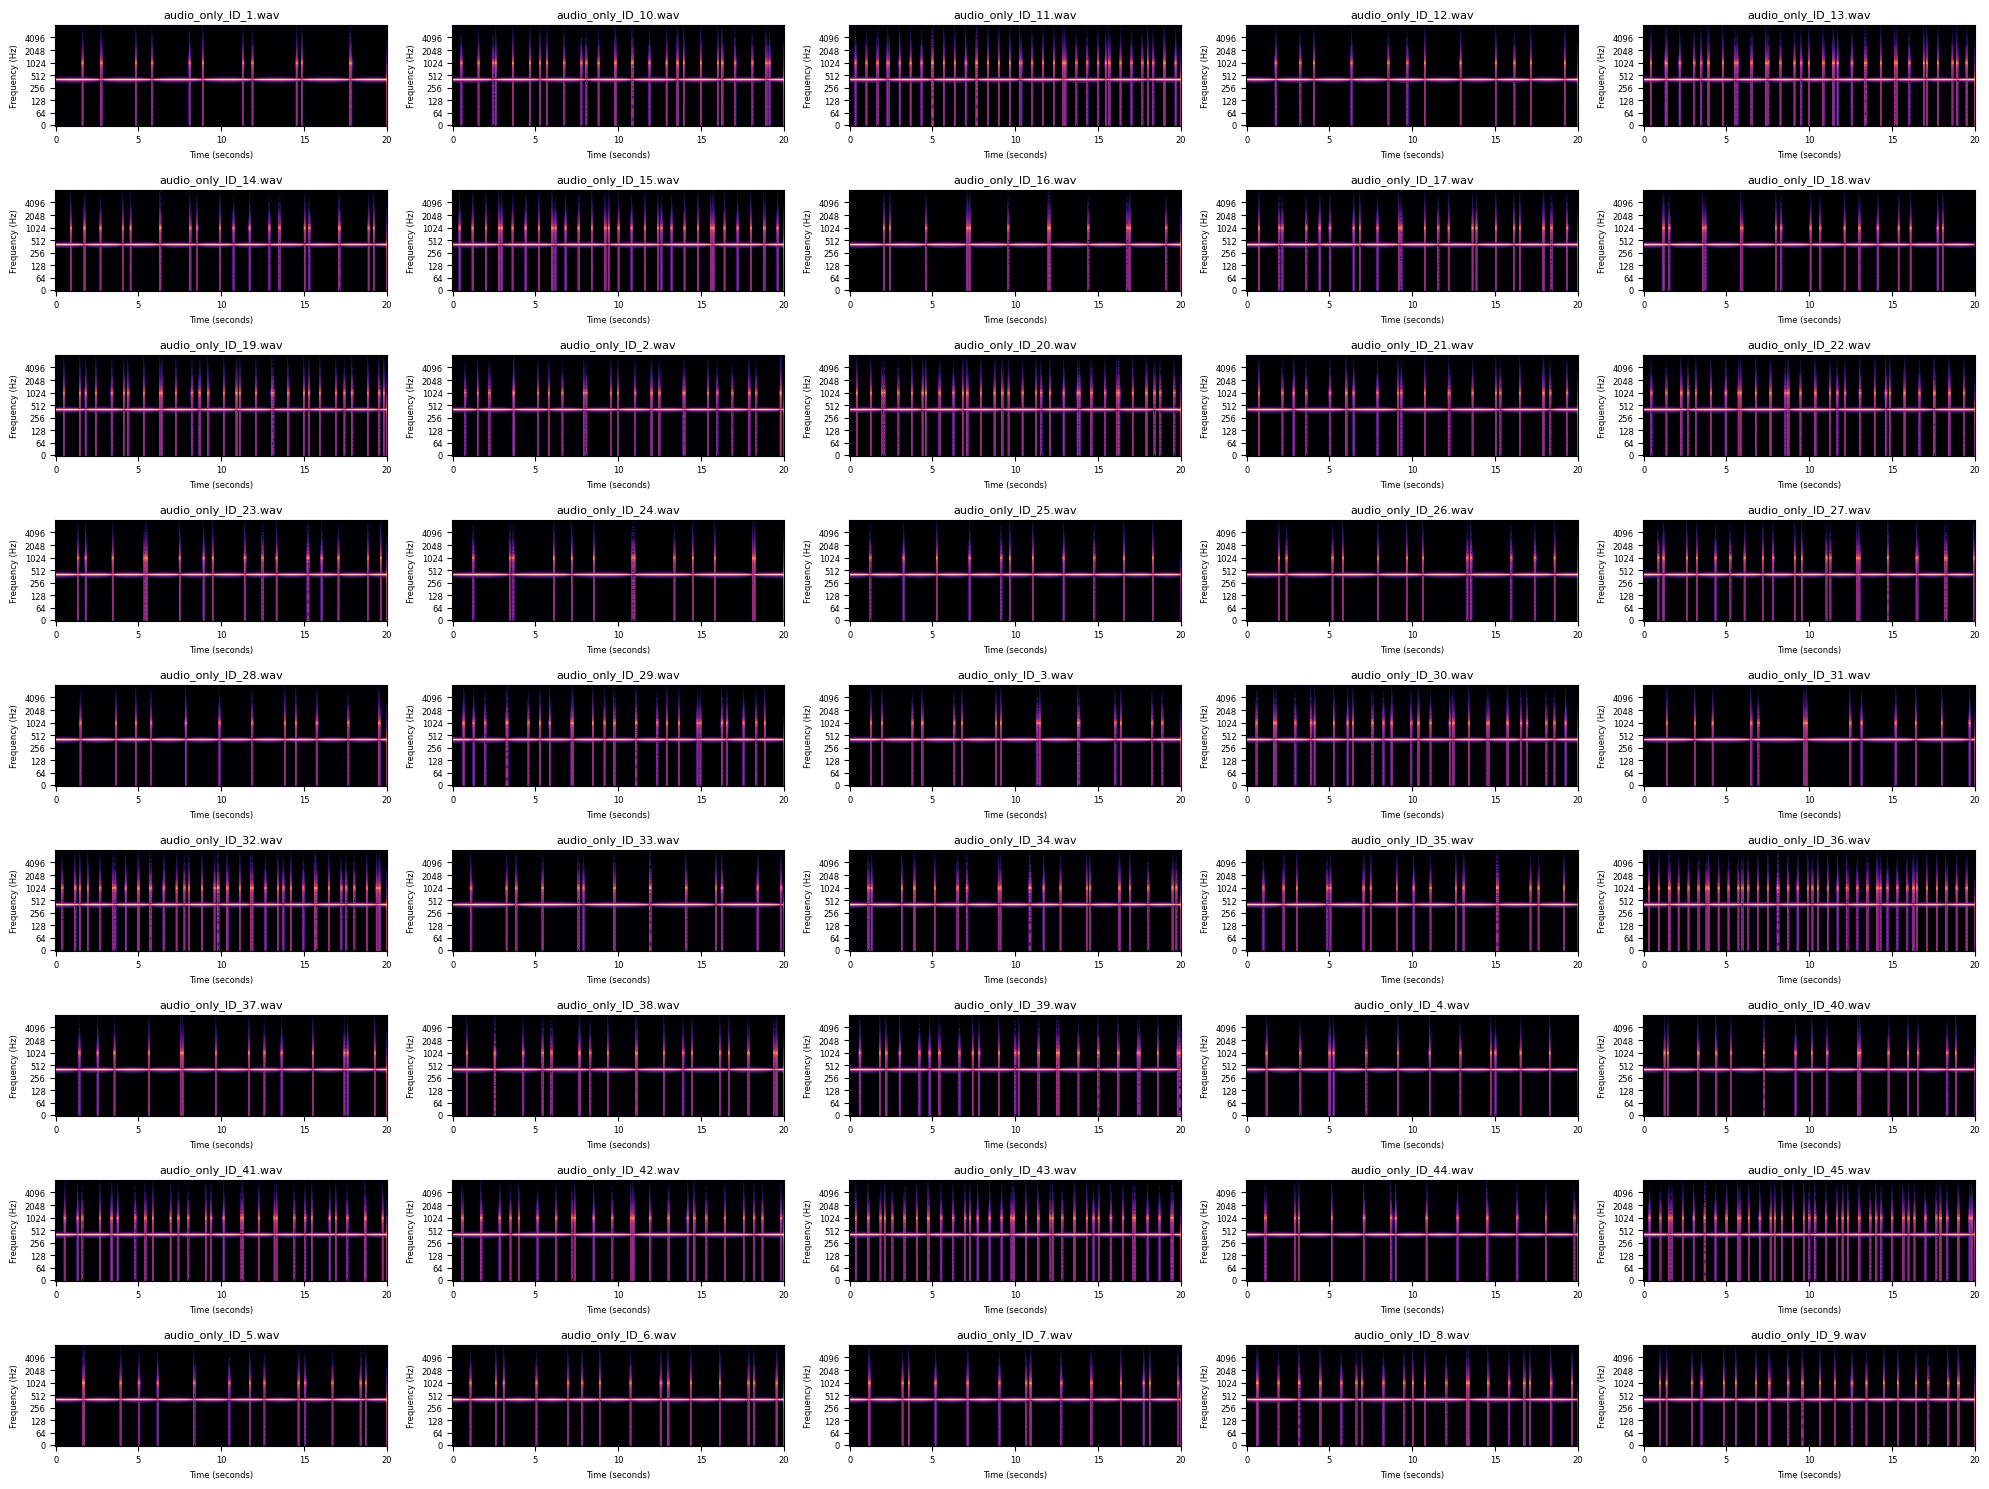

In [23]:
fig, axes = plt.subplots(9, 5, figsize=(20, 15))
axes = axes.flatten()

audio_files = [f for f in os.listdir(audio_folder) if f.endswith(".wav")]

for idx, audio_file in enumerate(audio_files):
    if idx >= len(axes): 
        break

    audio_path = os.path.join(audio_folder, audio_file)
    _, S_db, sr, _ = detect_collisions(audio_path)
    
    librosa.display.specshow(S_db, sr=sr, hop_length=512, x_axis='time', y_axis='log', ax=axes[idx])
    axes[idx].set_title(audio_file, fontsize=8)
    axes[idx].set_xlabel("Time (seconds)", fontsize=6)
    axes[idx].set_ylabel("Frequency (Hz)", fontsize=6)
    axes[idx].tick_params(axis='both', which='major', labelsize=6)

for ax in axes[len(audio_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# **Video Analysis Part**

## 1. **Import libraries and setup**

In [24]:
import cv2
import numpy as np
import os

## 2. **Playing Area Detection in Video**
**How it Works:**

* Captures initial frames.
* Converts to grayscale and detects edges.
* Uses Hough Lines or fallback contour methods to identify boundary box of the playing field.
* Fallback defaults to padded borders if detection fails.

In [25]:
# Function to detect the playing area boundaries

def detect_playing_area(cap):
    """Detects the playing area boundaries using edge and contour detection."""
    boundary_frames = 10
    frames = []
    
    for _ in range(boundary_frames):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    
    if not frames:
        return None
    
    first_frame = frames[0]
    gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    height, width = gray.shape
    
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=width/3, maxLineGap=20)
    
    if lines is None or len(lines) < 4:
        _, binary = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            playing_area = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(playing_area)
            boundaries = {"left": x, "right": x + w, "top": y, "bottom": y + h}
        else:
            padding = 10
            boundaries = {"left": padding, "right": width - padding, "top": padding, "bottom": height - padding}
    else:
        horizontal_lines, vertical_lines = [], []
        
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(x2 - x1) > abs(y2 - y1):
                horizontal_lines.append((y1 + y2) / 2)
            else:
                vertical_lines.append((x1 + x2) / 2)
        
        if len(horizontal_lines) < 2 or len(vertical_lines) < 2:
            padding = 10
            boundaries = {"left": padding, "right": width - padding, "top": padding, "bottom": height - padding}
        else:
            horizontal_lines.sort()
            vertical_lines.sort()
            boundaries = {
                "top": max(int(min(horizontal_lines)), 0),
                "bottom": min(int(max(horizontal_lines)), height),
                "left": max(int(min(vertical_lines)), 0),
                "right": min(int(max(vertical_lines)), width)
            }
    
    return boundaries

## 3. **Ball Collision Monitoring in Video**
**Detailed Steps:**

* Converts frame to HSV and applies color masking for the ball.
* Extracts contours to find the ball position.
* Tracks movement and calculates velocity.
* Detects collisions if the ball nears any boundary and velocity direction aligns with it.
* Avoids false positives using a minimum frame interval between collisions.

In [26]:
# Function to track ball collisions
def monitor_ball_collisions(cap, boundaries, fps):
    """Tracks the ball and detects collision events."""
    prev_positions = []
    collision_timestamps = []
    frame_count = 0
    
    min_frames_between_collisions = int(fps / 16)
    last_collision_frame = -min_frames_between_collisions
    base_collision_margin = 5
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_blue, upper_blue = np.array([100, 150, 50]), np.array([140, 255, 255])
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            c = max(contours, key=cv2.contourArea)
            M = cv2.moments(c)
            if M["m00"] != 0:
                cx, cy = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
                (_, _), radius = cv2.minEnclosingCircle(c)
                radius = int(radius)
                current_pos = (cx, cy, radius)
                
                prev_positions.append(current_pos)
                if len(prev_positions) > 10:
                    prev_positions.pop(0)
                
                if len(prev_positions) > 1:
                    prev_x, prev_y, _ = prev_positions[-2]
                    dx, dy = cx - prev_x, cy - prev_y
                    velocity = np.sqrt(dx**2 + dy**2)
                    collision_margin = base_collision_margin + int(velocity * 0.2)
                    
                    collision_detected = False
                    if (cx - radius) <= (boundaries["left"] + collision_margin) and dx < 0:
                        collision_detected = True
                    elif (cx + radius) >= (boundaries["right"] - collision_margin) and dx > 0:
                        collision_detected = True
                    elif (cy - radius) <= (boundaries["top"] + collision_margin) and dy < 0:
                        collision_detected = True
                    elif (cy + radius) >= (boundaries["bottom"] - collision_margin) and dy > 0:
                        collision_detected = True
                    
                    if collision_detected and (frame_count - last_collision_frame) > min_frames_between_collisions:
                        timestamp = frame_count / fps
                        collision_timestamps.append(timestamp)
                        last_collision_frame = frame_count
        
        frame_count += 1
    
    return collision_timestamps

## 4. **Video Processing Wrapper**
This wraps the process:

* Opens the video.
* Detects the playing area.
* Resets frame pointer and scans for ball collisions.
* Returns timestamps of all collision events.

In [27]:
# Comment: Function to analyze a video and detect collisions
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open {video_path}")
        return []
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    boundaries = detect_playing_area(cap)
    if not boundaries:
        print("Error: Could not detect playing area boundaries.")
        return []
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    collision_timestamps = monitor_ball_collisions(cap, boundaries, fps)
    
    cap.release()
    cv2.destroyAllWindows()
    
    return collision_timestamps

In [28]:
file_to_check = os.path.join(video_folder, "video_only_ID_1.mp4")

if file_to_check.endswith(".mp4"):
    print(f"Processing video file: {file_to_check}")
    collision_timestamps = process_video(file_to_check)
    print(f"Collision Timestamps (seconds): {collision_timestamps}")
else:
    print("Unsupported file type. Please provide a video file.")


Processing video file: video_only\video_only_ID_1.mp4
Collision Timestamps (seconds): [0.31666666666666665, 0.9833333333333333, 1.4666666666666666, 1.65, 2.316666666666667, 2.9833333333333334, 3.6333333333333333, 3.7, 4.316666666666666, 4.983333333333333, 5.65, 5.766666666666667, 5.833333333333333, 6.316666666666666, 6.983333333333333, 7.65, 7.866666666666666, 8.316666666666666, 8.983333333333333, 9.65, 9.933333333333334, 10.316666666666666, 10.983333333333333, 11.65, 11.966666666666667, 12.316666666666666, 12.983333333333333, 13.65, 13.966666666666667, 14.033333333333333, 14.316666666666666, 14.983333333333333, 15.65, 15.933333333333334, 16.316666666666666, 16.983333333333334, 17.65, 17.866666666666667, 17.933333333333334, 18.316666666666666, 18.983333333333334, 19.65, 19.766666666666666]


## 5. **Main Function for Batch Video Processing**
* Loops through all `.mp4` files.
* Calls `process_video()` on each.
* Writes results to a `.txt` file and stores in a dictionary for visualization.

In [29]:
#  Main function to process multiple videos
collision_data_video = {}

def main():
    video_folder = "video_only"
    output_path = "collision_timestamps.txt"
    
    for video_file in os.listdir(video_folder):
        if video_file.endswith(".mp4"):
            video_path = os.path.join(video_folder, video_file)
            print(f"Processing: {video_file}")
            collision_data_video[video_file] = process_video(video_path)
    
    with open(output_path, 'w') as f:
        for video_file, timestamps in collision_data_video.items():
            f.write(f"{video_file}:\n")
            for time in timestamps:
                f.write(f"  {time:.2f}s\n")
            f.write("\n")
    
    print("Collision data saved successfully!")
    print("Collision Data Dictionary:", collision_data_video)

In [30]:
if __name__ == "__main__":
    main()

Processing: video_only_ID_1.mp4
Processing: video_only_ID_10.mp4
Processing: video_only_ID_11.mp4
Processing: video_only_ID_12.mp4
Processing: video_only_ID_13.mp4
Processing: video_only_ID_14.mp4
Processing: video_only_ID_15.mp4
Processing: video_only_ID_16.mp4
Processing: video_only_ID_17.mp4
Processing: video_only_ID_18.mp4
Processing: video_only_ID_19.mp4
Processing: video_only_ID_2.mp4
Processing: video_only_ID_20.mp4
Processing: video_only_ID_21.mp4
Processing: video_only_ID_22.mp4
Processing: video_only_ID_23.mp4
Processing: video_only_ID_24.mp4
Processing: video_only_ID_25.mp4
Processing: video_only_ID_26.mp4
Processing: video_only_ID_27.mp4
Processing: video_only_ID_28.mp4
Processing: video_only_ID_29.mp4
Processing: video_only_ID_3.mp4
Processing: video_only_ID_30.mp4
Processing: video_only_ID_31.mp4
Processing: video_only_ID_32.mp4
Processing: video_only_ID_33.mp4
Processing: video_only_ID_34.mp4
Processing: video_only_ID_35.mp4
Processing: video_only_ID_36.mp4
Processing: v

In [31]:
collision_data_video # Display all collision data for all the video files

{'video_only_ID_1.mp4': [0.31666666666666665,
  0.9833333333333333,
  1.4666666666666666,
  1.65,
  2.316666666666667,
  2.9833333333333334,
  3.6333333333333333,
  3.7,
  4.316666666666666,
  4.983333333333333,
  5.65,
  5.766666666666667,
  5.833333333333333,
  6.316666666666666,
  6.983333333333333,
  7.65,
  7.866666666666666,
  8.316666666666666,
  8.983333333333333,
  9.65,
  9.933333333333334,
  10.316666666666666,
  10.983333333333333,
  11.65,
  11.966666666666667,
  12.316666666666666,
  12.983333333333333,
  13.65,
  13.966666666666667,
  14.033333333333333,
  14.316666666666666,
  14.983333333333333,
  15.65,
  15.933333333333334,
  16.316666666666666,
  16.983333333333334,
  17.65,
  17.866666666666667,
  17.933333333333334,
  18.316666666666666,
  18.983333333333334,
  19.65,
  19.766666666666666],
 'video_only_ID_10.mp4': [1.3,
  1.6833333333333333,
  1.7666666666666666,
  3.3666666666666667,
  5.25,
  5.316666666666666,
  5.433333333333334,
  7.433333333333334,
  7.5,
 

#### `collision_data_video` - Display all collision data for all the video files
#### `collision_data` - Display all collision data for all the audio files

In [32]:
import matplotlib.pyplot as plt

def plot_all_video_collisions(collision_data_video):
    plt.figure(figsize=(12, len(collision_data_video) * 0.6 + 2))

    video_names = list(collision_data_video.keys())
    collision_times = list(collision_data_video.values())

    # Create event plot (horizontal lines with tick marks at collision times)
    plt.eventplot(collision_times, orientation='horizontal', colors='red', lineoffsets=range(len(video_names)), linelengths=0.8)

    # Labeling and layout
    plt.xlabel("Time (seconds)")
    plt.yticks(ticks=range(len(video_names)), labels=video_names, fontsize=8)
    plt.title("Collision Events Across All Videos")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


#### The function is then called to generate the plot for the available collision data extracted from video files.

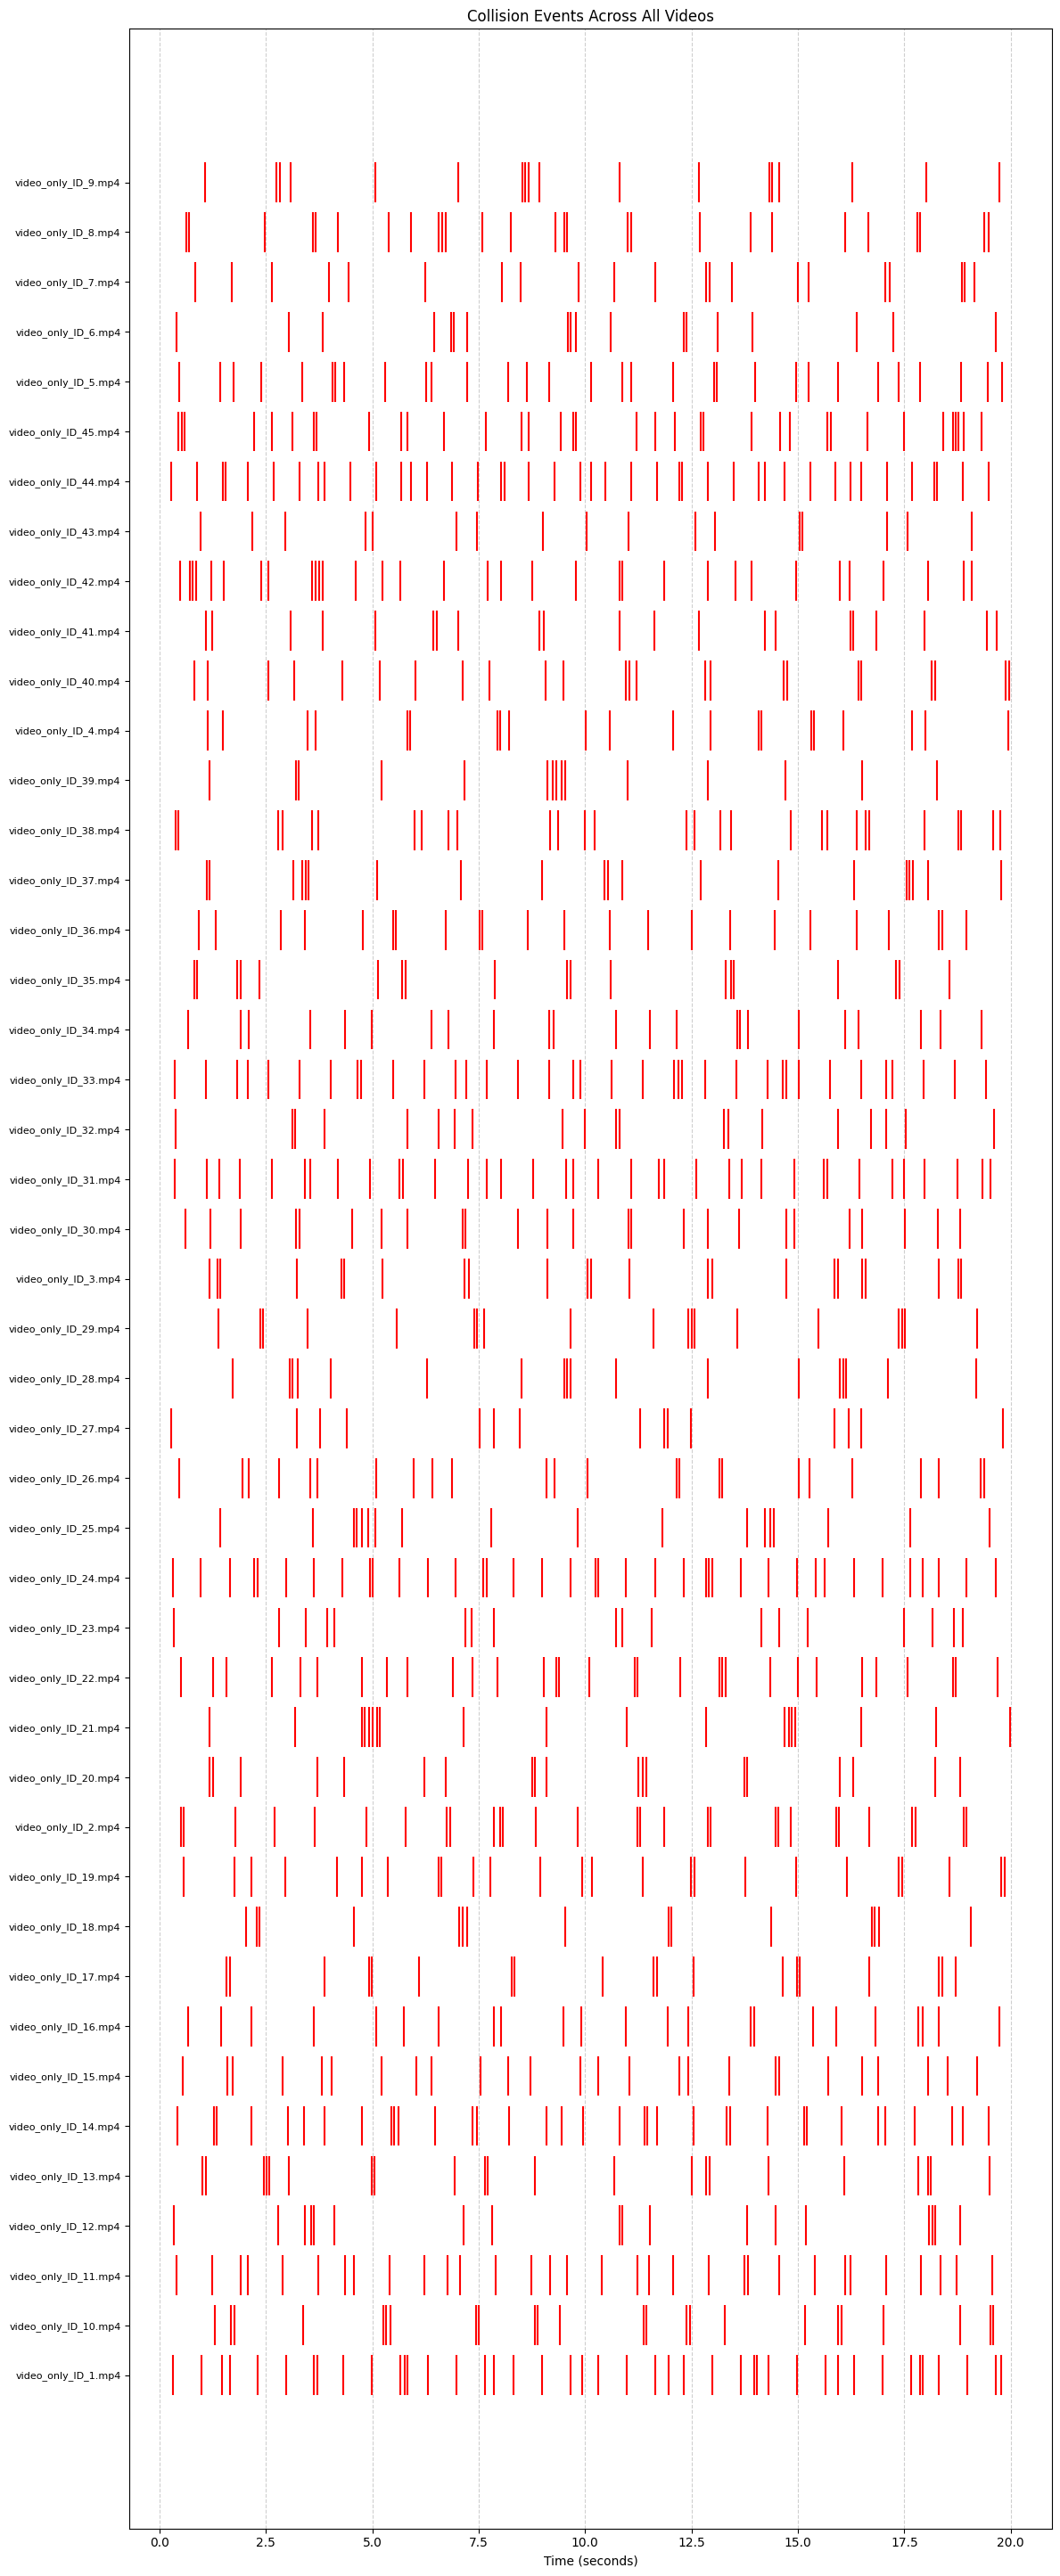

In [33]:
plot_all_video_collisions(collision_data_video)


# **Audio-Video Collision Sequence Matching**

In this section, we aim to match audio recordings to corresponding video recordings based on the temporal patterns of collision events. Each file contains a sequence of timestamps where collisions were detected.

### **Mathematical Part**

Let:

* $A_i = [a_1, a_2, \dots, a_m]$ be the sequence of detected collision timestamps in an audio file $i$,
* $V_j = [v_1, v_2, \dots, v_n]$ be the corresponding sequence in a video file $j$.

#### **Dynamic Time Warping (DTW)**

To compare sequences $A_i$ and $V_j$ with possibly different lengths and temporal alignment, we use **Dynamic Time Warping (DTW)**, which minimizes the cost of aligning them. The DTW distance is defined as:

$$
\text{DTW}(A_i, V_j) = \min_{w \in \mathcal{W}} \sum_{(p, q) \in w} d(a_p, v_q)
$$

where:

* $\mathcal{W}$ is the set of all valid warping paths,
* $d(a_p, v_q) = \| a_p - v_q \|_2$ is the Euclidean distance.

#### **Hungarian Algorithm**

Once we compute a cost matrix $C \in \mathbb{R}^{M \times N}$, where each entry $C_{ij} = \text{DTW}(A_i, V_j)$, the **Hungarian Algorithm** (Linear Sum Assignment) finds the optimal one-to-one matching that minimizes the total assignment cost.

---

### **Computing the DTW Distance**

This function takes two 1D sequences (audio and video collision timestamps) and returns the DTW distance using FastDTW and Euclidean distance.

In [34]:
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.optimize import linear_sum_assignment
from fastdtw import fastdtw

def compute_dtw_distance(audio_collisions, video_collisions):
    """Ensure input sequences are 1D and compute the DTW distance."""
    # Ensure the input sequences are 1D
    if isinstance(audio_collisions, list):
        audio_collisions = np.array(audio_collisions).reshape(-1, 1)
    if isinstance(video_collisions, list):
        video_collisions = np.array(video_collisions).reshape(-1, 1)

    # Compute DTW distance
    distance, _ = fastdtw(audio_collisions, video_collisions, dist=euclidean)
    return distance

### **9.2 Creating the DTW-Based Cost Matrix**

This function builds a cost matrix where each element $(i, j)$ represents the DTW distance between the $i$-th audio file and the $j$-th video file.

In [35]:
def create_cost_matrix(collision_data, collision_data_video):
    """Create a cost matrix based on DTW distances between audio and video collision timestamps."""
    audio_files = list(collision_data.keys())
    video_files = list(collision_data_video.keys())
    
    cost_matrix = np.zeros((len(audio_files), len(video_files)))
    
    for i, audio_file in enumerate(audio_files):
        audio_collisions = collision_data[audio_file]
        
        for j, video_file in enumerate(video_files):
            video_collisions = collision_data_video[video_file]
            
            # Compute the DTW distance between audio and video collision timestamps
            cost_matrix[i, j] = compute_dtw_distance(audio_collisions, video_collisions)
    
    return cost_matrix, audio_files, video_files

### **9.3 Optimal Matching Using the Hungarian Algorithm**

This function computes the optimal audio-to-video mapping that minimizes total DTW distance using the linear sum assignment algorithm.

In [36]:
def match_audio_to_video_dtw(collision_data, collision_data_video):
    """Match audio files to video files using DTW and the Hungarian algorithm."""
    cost_matrix, audio_files, video_files = create_cost_matrix(collision_data, collision_data_video)
    
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    final_mapping = [(audio_files[row], video_files[col]) for row, col in zip(row_ind, col_ind)]
    
    return final_mapping, cost_matrix

### **9.4 Executing and Displaying Final Matches**

We now execute the matching function and visualize the final audio-to-video mappings.

In [ ]:
final_matches, cost_matrix = match_audio_to_video_dtw(collision_data, collision_data_video)

cost_matrix, audio_files, video_files = create_cost_matrix(collision_data, collision_data_video)


In [41]:
def extract_id(filename):
    return int(''.join(filter(str.isdigit, filename)))

sorted_matches = sorted(final_matches, key=lambda x: extract_id(x[0]))

print("Final Audio-to-Video Mapping with DTW Distances (Sorted by Audio ID):")
for audio_file, video_file in sorted_matches:
    i = audio_files.index(audio_file)
    j = video_files.index(video_file)
    dtw_distance = cost_matrix[i, j]
    print(f"{audio_file} -> {video_file} | DTW Distance: {dtw_distance:.4f}")


Final Audio-to-Video Mapping with DTW Distances (Sorted by Audio ID):
audio_only_ID_1.wav -> video_only_ID_17.mp4 | DTW Distance: 7.8113
audio_only_ID_2.wav -> video_only_ID_12.mp4 | DTW Distance: 56.7760
audio_only_ID_3.wav -> video_only_ID_20.mp4 | DTW Distance: 0.8560
audio_only_ID_4.wav -> video_only_ID_21.mp4 | DTW Distance: 3.0760
audio_only_ID_5.wav -> video_only_ID_27.mp4 | DTW Distance: 129.2347
audio_only_ID_6.wav -> video_only_ID_13.mp4 | DTW Distance: 1.4873
audio_only_ID_7.wav -> video_only_ID_37.mp4 | DTW Distance: 1.5520
audio_only_ID_8.wav -> video_only_ID_32.mp4 | DTW Distance: 5.9620
audio_only_ID_9.wav -> video_only_ID_36.mp4 | DTW Distance: 1.0173
audio_only_ID_10.wav -> video_only_ID_42.mp4 | DTW Distance: 2.4273
audio_only_ID_11.wav -> video_only_ID_24.mp4 | DTW Distance: 1.0293
audio_only_ID_12.wav -> video_only_ID_28.mp4 | DTW Distance: 1.2260
audio_only_ID_13.wav -> video_only_ID_14.mp4 | DTW Distance: 0.9107
audio_only_ID_14.wav -> video_only_ID_39.mp4 | DTW D

In [43]:
import csv

csv_filename = "Final_Matching.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Audio File", "Video File"])
    writer.writerows(sorted_matches)

print(f"\nFinal audio-video mappings saved to {csv_filename}")



Final audio-video mappings saved to Final_Matching.csv


## Task 2 End
---